<a href="https://colab.research.google.com/github/Sattwikmaiti/EcommerceAnalyis/blob/master/ecommerceanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suggesting side products using Market Basket Analysis**



In [69]:
#https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/
import pandas as pd
import pickle

df = pd.read_csv('walmartbasket.csv')
df.head()
df['single_transaction'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)

df.head()
df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])
df2.head()
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = df2.applymap(encode)

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
694,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
695,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


# **Popularity Based Recommendation**

In [70]:
#https://github.com/aksharpandia/miniamazon_data/blob/master/amazon_co-ecommerce_sample.csv
import pandas as pd
import numpy as np
import difflib #spelling mistakes from user. compare closest proximity to movies
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import csv
# products = pd.read_csv('/content/drive/MyDrive/dataset.csv')
products=pd.read_csv('walmartsales.csv')

products.dropna(inplace=True)
products.isnull().sum()
products.shape
products.duplicated().sum()
ratings = products.iloc[:,7].values

collection=products.iloc[:,1].values

number_of_ratings=products.iloc[:,5].values
import pandas as pd

# Sample data with ratings column
data = {'Ratings': ratings,'Collection Name':collection,'Number-of-Ratings':number_of_ratings}
df = pd.DataFrame(data)

# Extract only the rating from the 'ratings' column using string manipulation
df['Rating'] = df['Ratings'].str.split().str[0]

# Convert the 'rating' column to float data type
df['Rating'] = df['Rating'].astype(float)
df['Number-of-Ratings']=df['Number-of-Ratings'].astype(int)

# Drop the original 'ratings' column if needed
df.drop(columns=['Ratings'], inplace=True)

print(df)
import pandas as pd

# Sample data with ratings column
data = {'Ratings': ratings,'Collection Name':collection,'Number-of-Ratings':number_of_ratings}
df = pd.DataFrame(data)

# Extract only the rating from the 'ratings' column using string manipulation
df['Rating'] = df['Ratings'].str.split().str[0]

# Convert the 'rating' column to float data type
df['Rating'] = df['Rating'].astype(float)
df['Number-of-Ratings']=df['Number-of-Ratings'].astype(int)

# Drop the original 'ratings' column if needed
df.drop(columns=['Ratings'], inplace=True)

print(df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                                       Collection Name  Number-of-Ratings  \
0                                Hornby 2014 Catalogue                 15   
1    CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...                 17   
2                     Hornby Santa's Express Train Set                 36   
3    Hornby Gauge Western Express Digital Train Set...                  1   
4    Hornby R3246TTS LNER 2-8-2 'Cock O' The North'...                  1   
..                                                 ...                ...   
506                            FIFA Scene It? DVD Game                  5   
507           DOMINO TILES RACKS. WOODEN. SET OF FOUR.                  7   
508           John Adams New Rummikub Junior Craft Kit                  1   
509                     Tobar 00435 Wooden Domino Race                 44   
510  Dominoes- double six, plastic,black spots,spin...                123   

     Rating  
0       4.9  
1       3.9  
2       4.3  
3       5.0  
4    

# **Content Based Recommendation System . Use React Autocomplete and Recommend the products**

In [72]:
import joblib
from sklearn.metrics.pairwise import cosine_similarity
tfv = TfidfVectorizer()
products['description'] = products['description'].fillna('')
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

vector = cv.fit_transform(products['description']).toarray()
#vector
similarity = cosine_similarity(vector)
# similarity
tfv_matrix = tfv.fit_transform(products['description'])

tfv_model_filename = 'tfidf_vectorizer_model.pkl'
joblib.dump(tfv, tfv_model_filename)
print(df)
#tfv_matrix.shape
#print(tfv_matrix)
sig = cosine_similarity(tfv_matrix,tfv_matrix)
#sig
indices = pd.Series(products.index,index=products['product_name']).drop_duplicates()
indices

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                                       Collection Name  Number-of-Ratings  \
0                                Hornby 2014 Catalogue                 15   
1    CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...                 17   
2                     Hornby Santa's Express Train Set                 36   
3    Hornby Gauge Western Express Digital Train Set...                  1   
4    Hornby R3246TTS LNER 2-8-2 'Cock O' The North'...                  1   
..                                                 ...                ...   
506                            FIFA Scene It? DVD Game                  5   
507           DOMINO TILES RACKS. WOODEN. SET OF FOUR.                  7   
508           John Adams New Rummikub Junior Craft Kit                  1   
509                     Tobar 00435 Wooden Domino Race                 44   
510  Dominoes- double six, plastic,black spots,spin...                123   

     Rating  
0       4.9  
1       3.9  
2       4.3  
3       5.0  
4    

product_name
Hornby 2014 Catalogue                                                                  0
CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY             2
Hornby Santa's Express Train Set                                                       7
Hornby Gauge Western Express Digital Train Set with eLink and TTS Loco Train Set       8
Hornby R3246TTS LNER 2-8-2 'Cock O' The North' P2 Class with TTS Sound                30
                                                                                    ... 
FIFA Scene It? DVD Game                                                             9915
DOMINO TILES RACKS. WOODEN. SET OF FOUR.                                            9916
John Adams New Rummikub Junior Craft Kit                                            9941
Tobar 00435 Wooden Domino Race                                                      9948
Dominoes- double six, plastic,black spots,spinners-00121                            9949
Length: 

In [73]:
tfv_model_filename = 'tfidf_vectorizer_model.pkl'
tfv_loaded = joblib.load(tfv_model_filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [74]:
def recommend(n):
  new_descriptions = [n]
  new_tfidf_matrix = tfv_loaded.transform(new_descriptions)

  tfidf_similarity = cosine_similarity(new_tfidf_matrix, tfv_matrix)

  # Assuming you want to find the most similar product(s) for each new description
  num_similar_products = 5
  similar_products_indices = tfidf_similarity.argsort(axis=1)[:, -num_similar_products:]

  for i, similar_indices in enumerate(similar_products_indices):
      print(f"Top similar products for new description {i+1}:")
      for idx in similar_indices:
          print(products['description'].iloc[idx])
      print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [75]:

new_tfidf_matrix = tfv_loaded.transform(products['description'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
tfidf_similarity = cosine_similarity(new_tfidf_matrix, new_tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:

def product_recommendation(title,sig=sig):

    indx = indices[title]
    indx

    #getting pairwise similarity scores
    sig = pickle.load(open('model(tfv).pkl', 'rb'))
    sig_scores = list(enumerate(sig[indx]))

    # #sorting products
    # sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    #10 most similar products score
    sig_scores = sig_scores[1:11]

    #product indexes
    product_indices = [i[0] for i in sig_scores]

    #Top 10 most similar products
    return products['product_name'].iloc[product_indices]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
n=input("Enter the name of the product: ")
print("\nTop Recommended products are: \n")
print(recommend(n))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Enter the name of the product: HORBY

Top Recommended products are: 

Top similar products for new description 1:
Suitable for the following scale(s): HO Scale
Military Minatures German Hanomag Sd.kfz. 251/1 - 1:35 Scale Military - Tamiya - Highly detailed 1/35 scale model kit of the Sonderkraftfahrzeug 251 (SdKfz 251), an armored half-track vehicle designed by Hanomag and used by Germany during the Second World War. Many different versions of the Sdkfz 251 were produced by Germany throughout World War II to meet different infantry support roles. This model kit depicts the Sdkfz 251/1, the standard personnel carrier variant of the type. The kit includes 5 crew figures in life-like poses. - * Tamiya Item#: 35020 - * Precision **ASSEMBLY-REQUIRED PLASTIC MODEL KIT** with parts mounted on sprue trees - * Assembly & painting required. Requires glue, paint, & modeling tools (not included)
Style Name:Infantry Tank Churchill Mk.VII British Infantry Tank - 1:35 Scale Military - Tamiya
Product 

# **Predict Next Purchase Date of Customer using XGBOOST and RFM(Recency,frequency market).Also Idea of Customer Churn**

In [80]:
#https://www.kaggle.com/code/sattwikmaiti/predict-customers-next-purchase-day-xgboost-w-rfm/edit


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [81]:
'''import machine learning related libraries'''
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time

'''Import all required Libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)
wrn.filterwarnings('ignore', category = UserWarning)

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

'''Special Visualization'''
import missingno as msno
import networkx as nx

%matplotlib inline


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [82]:
'''Load the data'''
df = pd.read_csv('Sales.csv')
df.head()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,0,2354,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,1,2361,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,2,2415,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,3,2427,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,4,2456,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [83]:
# We store the parameters used in RFM analysis in new dataset
Rtl_data = df[['CustomerID','TOTAL_ORDERS','REVENUE','LATEST_ORDER_DATE','AVGDAYSBETWEENORDERS']]
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2021-10-24. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2021,10,24)

#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'LATEST_ORDER_DATE': lambda x: (Latest_Date - pd.to_datetime(x.max())).days, 'AVGDAYSBETWEENORDERS': lambda x: int(x), 'REVENUE': lambda x: int(x)})

#Convert Invoice Date into type int
RFMScores['LATEST_ORDER_DATE'] = RFMScores['LATEST_ORDER_DATE'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'LATEST_ORDER_DATE': 'Recency',
                         'AVGDAYSBETWEENORDERS': 'Frequency',
                         'REVENUE': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,2333,52,8,34847
1,2334,93,15,32486
2,2335,52,24,24178
3,2336,4,21,18554
4,2337,129,76,16884


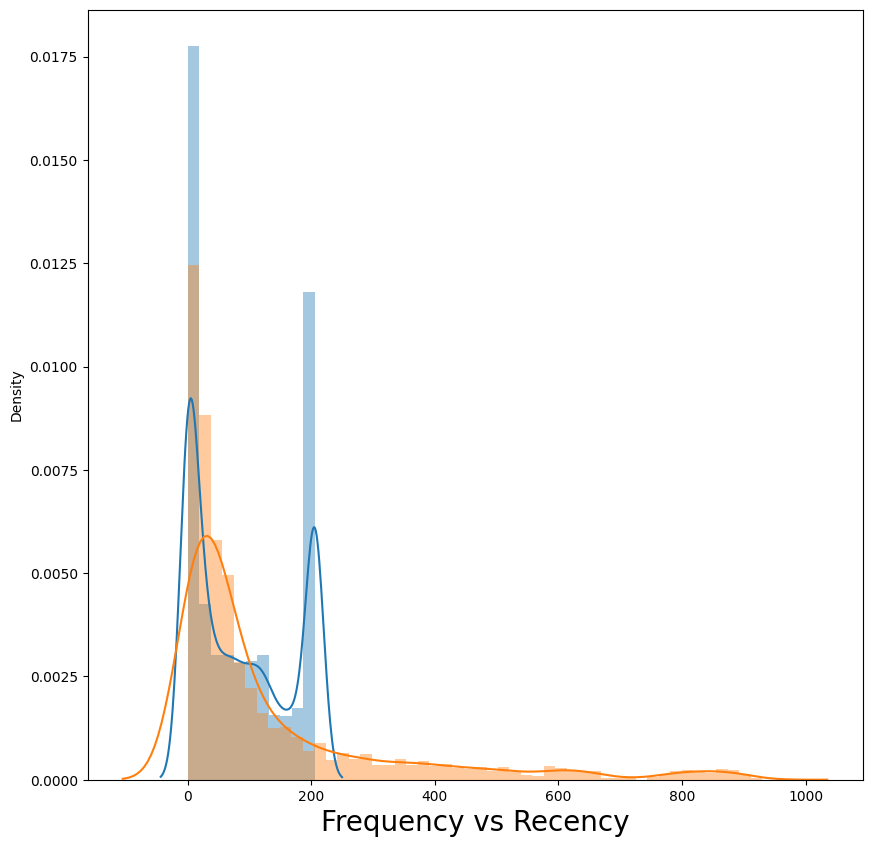

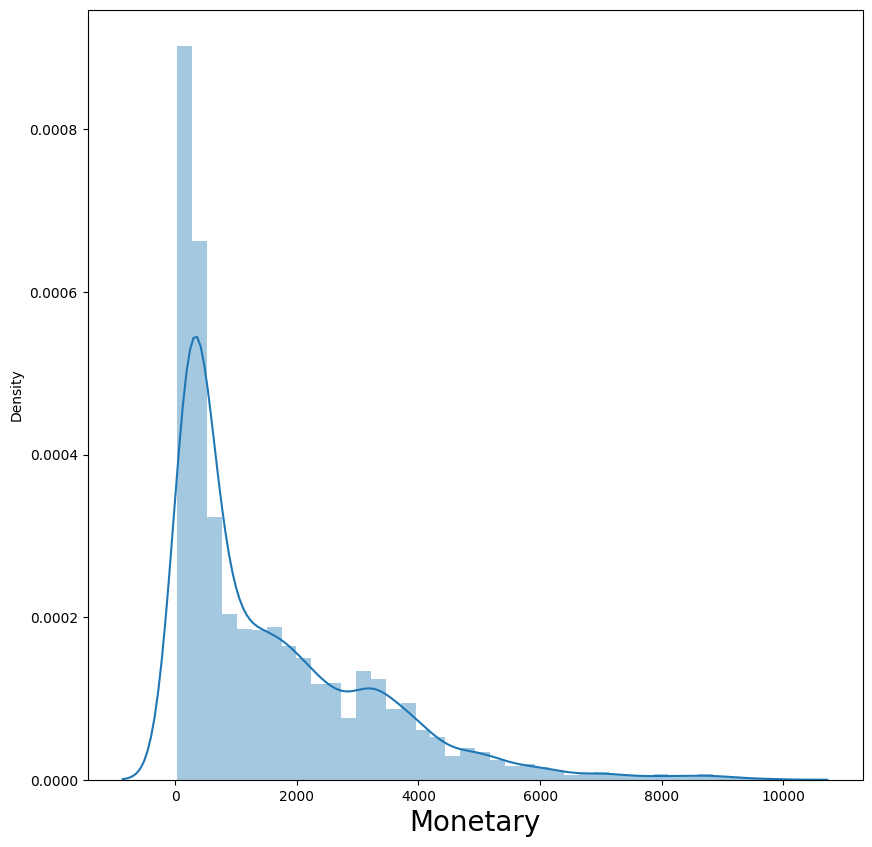

In [107]:
x = RFMScores['Recency']
ax = sns.distplot(x)

plt.rcParams['figure.figsize'] = (10, 10)
x = RFMScores.query('Frequency < 1000')['Frequency']
ax = sns.distplot(x = x)
ax.set_xlabel('Frequency vs Recency', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 10)
x = RFMScores.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x = x)
ax.set_xlabel('Monetary', fontsize = 20)
plt.show()

In [85]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.80])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 6.0, 0.5: 67.0, 0.8: 206.0},
 'Frequency': {0.25: 21.0, 0.5: 57.0, 0.8: 235.0},
 'Monetary': {0.25: 315.0, 0.5: 966.0, 0.8: 3026.2000000000003}}

In [86]:
'''We should give low score to low Recency value.'''
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4
'''For Frequewncy and Monetary, higher the value lower the score'''
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

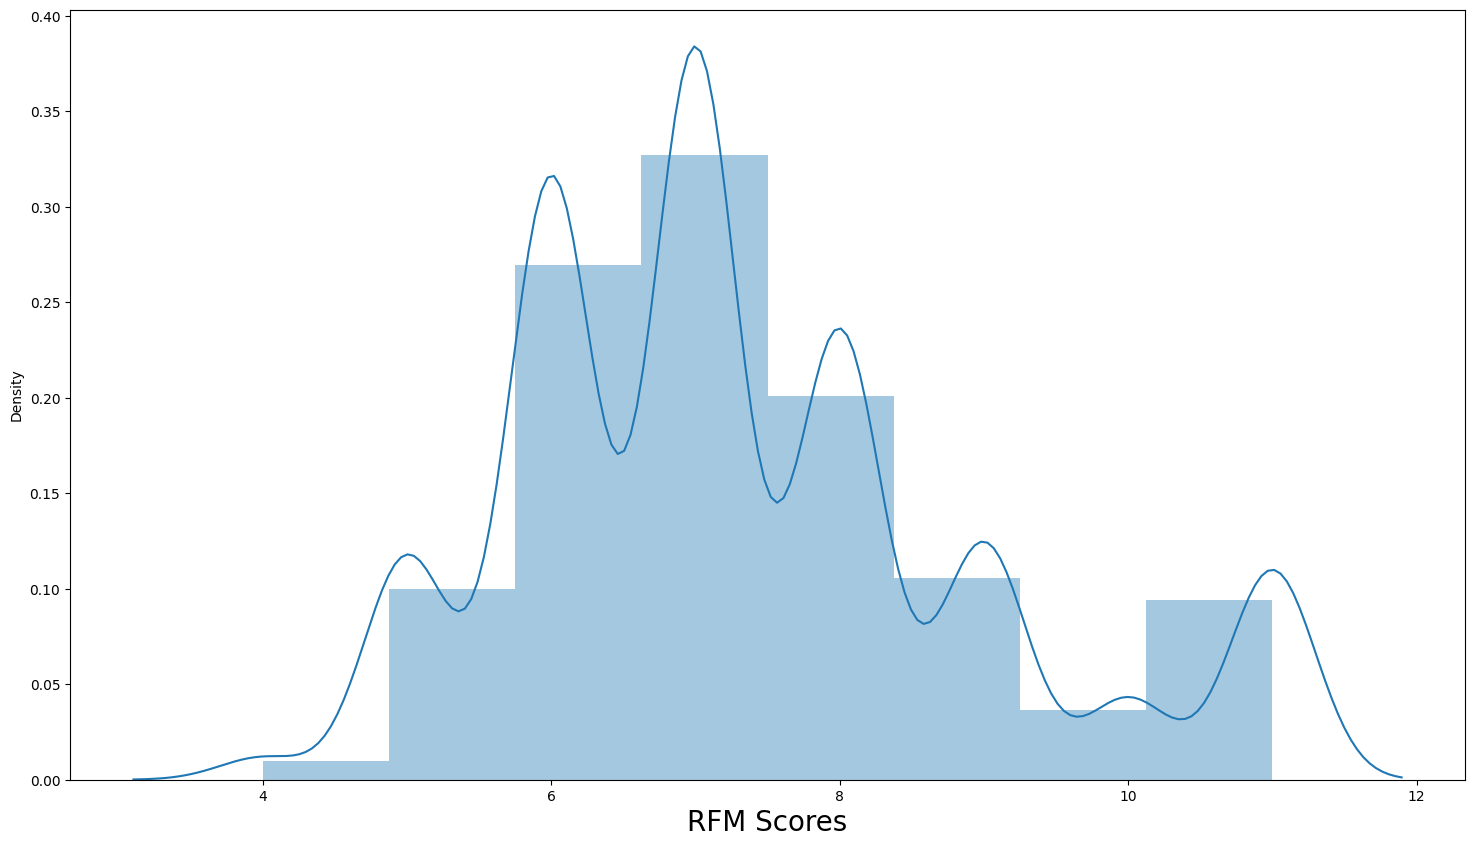

In [87]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()
'''Calculate and Add RFMGroup value column showing combined concatenated score of RFM'''
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

'''Calculate and Add RFMScore value column showing total sum of RFMGroup values'''
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.distplot(RFMScores['RFMScore'], bins=8)
ax.set_xlabel('RFM Scores', fontsize = 20)
plt.show()

In [88]:
'''lets give the segments a group name'''
def handel_badge(value):
    if(value>=10):
        return 'Bronze'
    elif(value>=8 and value<10):
        return 'Silver'
    elif(value>=6 and value<8):
        return 'Gold'
    else:
        return 'Platinum'

# Storing all the values in a list
list1=RFMScores['RFMScore'].apply(handel_badge)
list1

CustomerID
2333        Gold
2334      Silver
2335        Gold
2336        Gold
2337        Gold
           ...  
251041      Gold
251042    Silver
261374    Silver
268356    Silver
279492      Gold
Name: RFMScore, Length: 5000, dtype: object

In [89]:
RFMScores['RFM_Loyalty_Level']=list1
RFMScores.reset_index().head()
RFMScores.dropna()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
2333,52,8,34847,2,4,1,241,7,Gold
2334,93,15,32486,3,4,1,341,8,Silver
2335,52,24,24178,2,3,1,231,6,Gold
2336,4,21,18554,1,4,1,141,6,Gold
2337,129,76,16884,3,2,1,321,6,Gold
...,...,...,...,...,...,...,...,...,...
251041,53,1216,59,2,1,4,214,7,Gold
251042,118,1194,59,3,1,4,314,8,Silver
261374,127,1256,51,3,1,4,314,8,Silver


<class 'pandas.core.series.Series'>


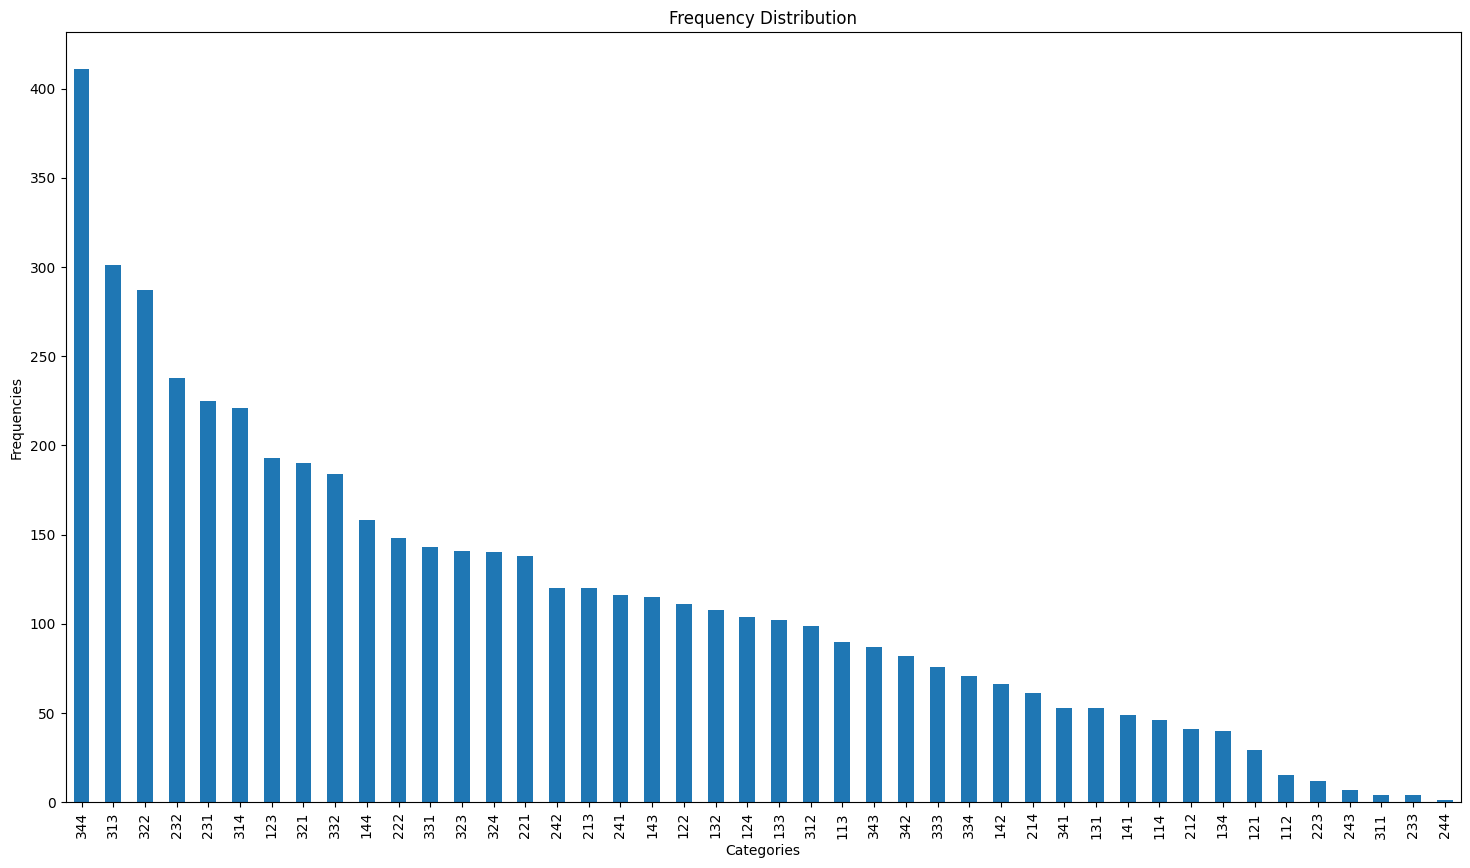

In [90]:

df2=RFMScores['RFMGroup'].sort_values(ascending=True)

ax=df2.value_counts()
print(type(ax))
ax.plot(kind='bar')


plt.xlabel('Categories')
plt.ylabel('Frequencies')
plt.title('Frequency Distribution')

# Display the plot
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py

def pie_plot(cnt_srs, colors, title):
    labels = cnt_srs.index
    values = cnt_srs.values
    trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   hoverinfo='percent+value',
                   textinfo='percent',
                   textposition='inside',
                   hole=0.6,
                   showlegend=True,
                   marker=dict(colors=colors, line=dict(color='#000000', width=2))
              )
    return trace

# Sample data (replace this with your data)
data = {'Age Rating': ['Teen', 'Everyone', 'Mature', 'Everyone', 'Teen', 'Everyone', 'Everyone']}
list1 = pd.DataFrame(data)['Age Rating']

# Define colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Create the pie chart trace
pie_trace = pie_plot(list1.value_counts(), colors, 'Age Rating')

# Plot the pie chart
py.iplot([pie_trace])
py

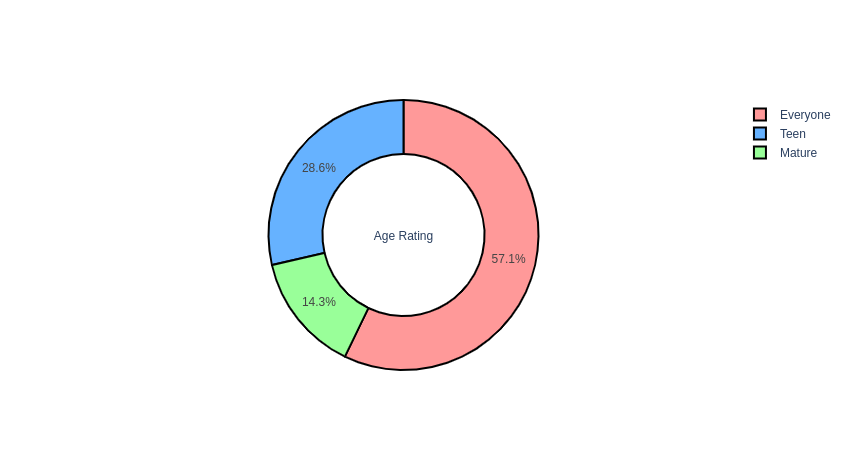

# **The Next Purchase Date of the customer**

In [92]:
df.drop('index', axis=1, inplace=True)
df


,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,2354,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,2361,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,2415,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,2427,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,2456,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,176278,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4996,176319,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4997,176336,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4998,176370,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00


In [93]:
merged = pd.merge(df,RFMScores,on='CustomerID',how='left')
# merged.sort_values('Frequency',ascending=False)
merged['NextPurchaseDayRange'] = 1
merged
merged.loc[merged.Frequency>90, 'NextPurchaseDayRange'] = 0
merged
merged['FIRST_ORDER_DATE'] = pd.to_datetime(merged['FIRST_ORDER_DATE'])
merged['LATEST_ORDER_DATE'] = pd.to_datetime(merged['LATEST_ORDER_DATE'])
merged['RFMGroup'] = merged['RFMGroup'].astype(str).astype(int)
merged = merged.drop(['FIRST_ORDER_DATE','LATEST_ORDER_DATE','Frequency','RFM_Loyalty_Level'], axis=1)
X, y = merged.drop('NextPurchaseDayRange', axis=1), merged.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, shuffle=True)
parameter = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'),
                             param_grid = parameter,
                             scoring='accuracy',
                             n_jobs=-1,
                             #iid=False,
                             cv=2
                            )

p_grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

In [94]:
merged

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Recency,Monetary,R,F,M,RFMGroup,RFMScore,NextPurchaseDayRange
0,2354,124,11986.54,96.67,529.59,4.27,14.19,1,13,13,...,3916.53,1327.44,0,11986,1,4,1,141,6,1
1,2361,82,11025.96,134.46,97.92,1.19,15.89,1,11,13,...,2205.47,5646.55,0,11025,1,4,1,141,6,1
2,2415,43,7259.69,168.83,171.69,3.99,33.12,1,5,4,...,2560.91,3990.80,0,7259,1,3,1,131,5,1
3,2427,44,6992.27,158.92,92.82,2.11,21.11,1,10,8,...,2025.05,3058.23,0,6992,1,4,1,141,6,1
4,2456,55,6263.44,113.88,179.04,3.26,6.65,1,2,3,...,3004.77,1559.50,0,6263,1,4,1,141,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,176278,1,117.49,117.49,4.99,4.99,0.00,207,0,0,...,0.00,117.49,206,117,3,4,4,344,11,1
4996,176319,1,117.49,117.49,4.99,4.99,0.00,207,0,0,...,0.00,117.49,206,117,3,4,4,344,11,1
4997,176336,1,117.49,117.49,4.99,4.99,0.00,207,0,0,...,0.00,117.49,206,117,3,4,4,344,11,1
4998,176370,1,117.49,117.49,4.99,4.99,0.00,207,0,0,...,117.49,0.00,206,117,3,4,4,344,11,1


In [95]:
p_grid_search.best_params_, p_grid_search.best_score_
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss',
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1,
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 1.00


In [96]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)
log_reg_pred_y = LogisticRegression().fit(X_train, y_train).predict(X_test)
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.

    INPUT:
        y_test - A numpy array
        y_pred - A numpy array

    OUTPUT:
        NoneType
    """

    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],
                              rownames=['Actual'],
                              colnames=['Predicted'])

    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()
    get_confusion_matrix(np.array(y_test), ref_xgb_pred_y)

# **Reviews Sentiment Analysis**

In [100]:
#https://drive.google.com/drive/folders/1Vbz73qJ0GlhFIvm8NIipbIqtE5M7t_tm
import pandas as pd
data=pd.read_csv('walmartreviews.csv')
data.head()

data=data.dropna()
data.shape

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["sentiment"]=[sentiments.polarity_scores(i)['compound'] for i in data["reviewText"]]
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["reviewText"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["reviewText"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["reviewText"]]

data.head()
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])
sentiment=sum(data["sentiment"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")



score(x,y,z)
positive=0;
negative=0;
neutral=0;

for i in data["sentiment"]:
  if(i>=0.05):
    positive=positive+i
  elif(i<=-0.05):
    negative=negative+i
  else:
    neutral=neutral+i



print('Positive=>',positive )
print('Negative=>',negative)
print('Neutral=>',neutral)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Neutal
Positive=> 2434.6712999999913
Negative=> -403.1770000000002
Neutral=> 0.16240000000000002
